References:

https://www.ncei.noaa.gov/access/world-ocean-atlas-2023/

https://www.ncei.noaa.gov/thredds-ocean/catalog/woa23/DATA/salinity/netcdf/B5C2/1.00/catalog.html?dataset=woa23/DATA/salinity/netcdf/B5C2/1.00/woa23_B5C2_s00_01.nc

https://www.ncei.noaa.gov/thredds-ocean/dodsC/woa23/DATA/salinity/netcdf/B5C2/1.00/woa23_B5C2_s00_01.nc.html

https://www.ncei.noaa.gov/data/oceans/woa/WOA23/DOCUMENTATION/WOA23_Product_Documentation.pdf


In [12]:
!pip install netCDF4 -q
!pip install Basemap -q
#!pip install mpl_tools -q

In [13]:
import datetime
from datetime import timedelta, datetime
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy import optimize

In [14]:
import os
print(os.listdir())  # Check available files in the current directory


['.config', 'woa23_B5C2_s00_01.nc', 'sample_data']


In [15]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
dataset = nc.Dataset('/content/woa23_B5C2_s00_01.nc')
print(dataset.variables.keys())

# Extract latitude, longitude, depth, and temperature
lat_o = dataset['lat'][:]
lon_o = dataset['lon'][:]
depth = dataset['depth'][:]
time = dataset['time'][:]

s_mn = dataset['s_mn'][-1, :, :, :]  # Shape: (depth, lat, lon) assuming time=latest month in 2022

dict_keys(['crs', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'depth', 'depth_bnds', 'time', 'climatology_bounds', 's_an', 's_mn', 's_dd', 's_sd', 's_se', 's_oa', 's_gp', 's_sdo', 's_sea'])


# Plotting Salinity vs Depth for Coral Sea, Yellow Sea and Java Sea

Coral Sea

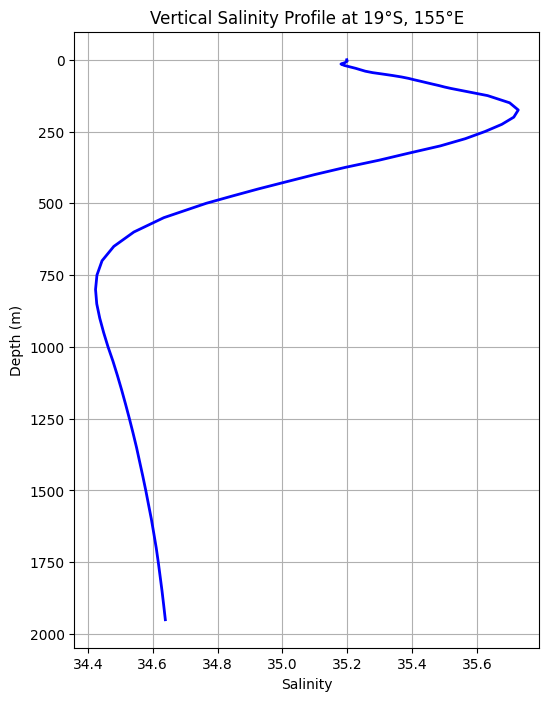

In [16]:
# Nearest lat/lon indices
lat_indices = [70, 71]  # Corresponding to -19.5°S and -18.5°S
lon_indices = [334, 335]  # Corresponding to 154.5°E and 155.5°E

# Removes masked values
valid_salinity_00 = s_mn[:, lat_indices[0], lon_indices[0]].compressed()[:66]
valid_salinity_01 = s_mn[:, lat_indices[0], lon_indices[1]].compressed()[:66]
valid_salinity_10 = s_mn[:, lat_indices[1], lon_indices[0]].compressed()[:66]
valid_salinity_11 = s_mn[:, lat_indices[1], lon_indices[1]].compressed()

valid_depths = depth[~s_mn[:, lat_indices[1], lon_indices[1]].mask] # has least depth at 66 = 1950m

# Extract salinity at these four points and take the mean
salinity_profile = np.mean([
    valid_salinity_00,
    valid_salinity_01,
    valid_salinity_10,
    valid_salinity_11
], axis=0)

# Plot vertical salinity distribution
plt.figure(figsize=(6, 8))
plt.plot(salinity_profile, valid_depths, linestyle='-', linewidth=2, color='b')

# Invert y-axis so depth increases downward
plt.gca().invert_yaxis()

# Label
plt.xlabel("Salinity")
plt.ylabel("Depth (m)")
plt.title("Vertical Salinity Profile at 19°S, 155°E")
plt.grid()
plt.show()

Yellow Sea

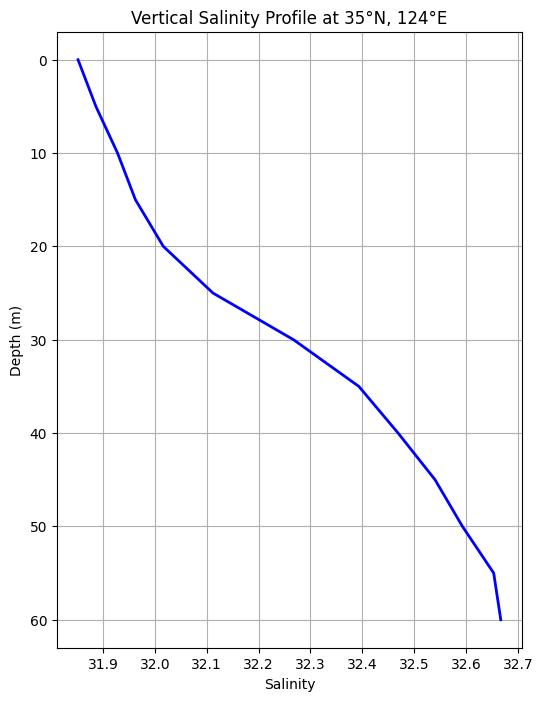

In [17]:
# Nearest lat/lon indices
lat_indices = [124, 125]  # Corresponding to 34.5°N and 35.5°N, corresponding to lat_a indices
lon_indices = [303, 304]  # Corresponding to 123.5°E and 124.5°E, corresponding to lon_o indices

# Removes masked values
valid_salinity_00 = s_mn[:, lat_indices[0], lon_indices[0]].compressed()
valid_salinity_01 = s_mn[:, lat_indices[0], lon_indices[1]].compressed()[:13]
valid_salinity_10 = s_mn[:, lat_indices[1], lon_indices[0]].compressed()
valid_salinity_11 = s_mn[:, lat_indices[1], lon_indices[1]].compressed()[:13]

valid_depths = depth[~s_mn[:, lat_indices[0], lon_indices[0]].mask] # has least depth at 13 = 60m

# Extract salinity at these four points and take the mean
salinity_profile = np.mean([
    valid_salinity_00,
    valid_salinity_01,
    valid_salinity_10,
    valid_salinity_11
], axis=0)

# Plot vertical salinity distribution
plt.figure(figsize=(6, 8))
plt.plot(salinity_profile, valid_depths, linestyle='-', linewidth=2, color='b')

# Invert y-axis so depth increases downward
plt.gca().invert_yaxis()

# Label
plt.xlabel("Salinity")
plt.ylabel("Depth (m)")
plt.title("Vertical Salinity Profile at 35°N, 124°E")
plt.grid()
plt.show()

Java Sea

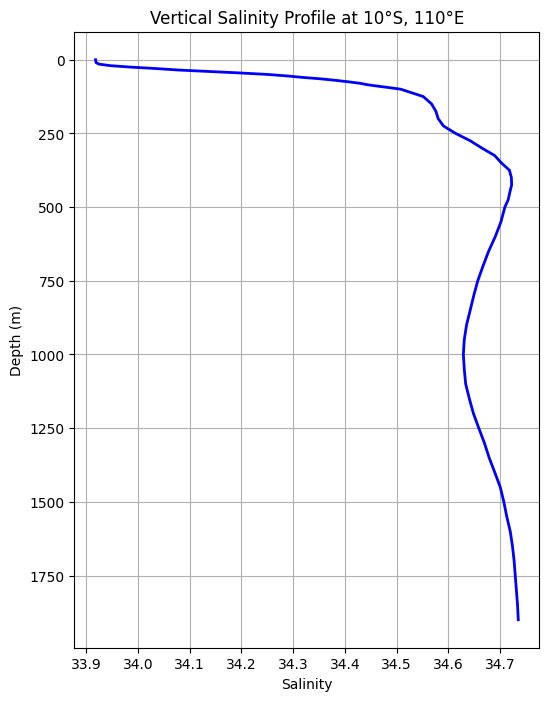

In [18]:
# Nearest lat/lon indices
lat_indices = [79, 80]  # Corresponding to 10.5°S and 9.5°S, corresponding to lat_a indices
lon_indices = [289, 290]  # Corresponding to 109.5°E and 110.5°E, corresponding to lon_o indices

# Removes masked values
valid_salinity_00 = s_mn[:, lat_indices[0], lon_indices[0]].compressed()[:65]
valid_salinity_01 = s_mn[:, lat_indices[0], lon_indices[1]].compressed()[:65]
valid_salinity_10 = s_mn[:, lat_indices[1], lon_indices[0]].compressed()[:65]
valid_salinity_11 = s_mn[:, lat_indices[1], lon_indices[1]].compressed()

valid_depths = depth[~s_mn[:, lat_indices[1], lon_indices[1]].mask] # has least depth at 65 = 1950m

# Extract salinity at these four points and take the mean
salinity_profile = np.mean([
    valid_salinity_00,
    valid_salinity_01,
    valid_salinity_10,
    valid_salinity_11
], axis=0)

# Plot vertical salinity distribution
plt.figure(figsize=(6, 8))
plt.plot(salinity_profile, valid_depths, linestyle='-', linewidth=2, color='b')

# Invert y-axis so depth increases downward
plt.gca().invert_yaxis()

# Label
plt.xlabel("Salinity")
plt.ylabel("Depth (m)")
plt.title("Vertical Salinity Profile at 10°S, 110°E")
plt.grid()
plt.show()